Task 6 AICP EDA Internship

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB
None
   year  month  day gender  births  Decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960
year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

<Figure size 1200x600 with 0 Axes>

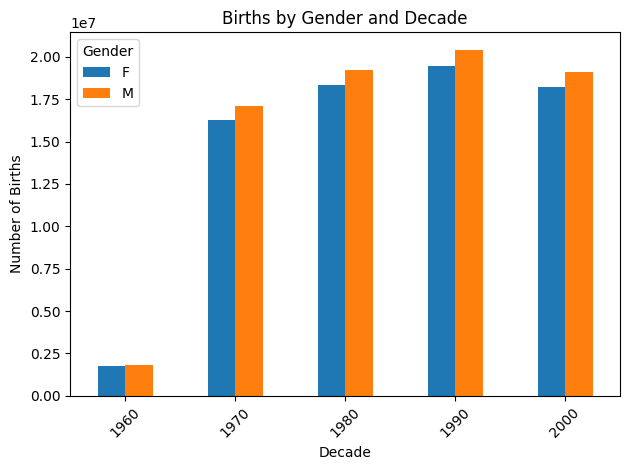

Summary:
- Missing values filled: 0 rows
- Date range: 1969 to 2008
- Total births: 151774378


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'births.csv'
births = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
print(births.head())
print(births.info())

# Add a new column 'Decade' by calculating the decade for each year
births['Decade'] = (births['year'] // 10) * 10

# Display the first few rows to confirm the new column
print(births.head())

# Check for missing values in the dataset
missing_values = births.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

# Fill missing values with mean of the day column
births['day'] = births['day'].fillna(births['day'].mean())

# Create decade-based analysis
births_by_decade = births.groupby(['Decade', 'gender'])['births'].sum().unstack()

plt.figure(figsize=(12, 6))
births_by_decade.plot(kind='bar')
plt.title('Births by Gender and Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\
Summary:")
print("- Missing values filled:", births['day'].isna().sum(), "rows")
print("- Date range:", births['year'].min(), "to", births['year'].max())
print("- Total births:", births['births'].sum())






Another method

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB
None
   year  month  day gender  births  Decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960
year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

<Figure size 1200x600 with 0 Axes>

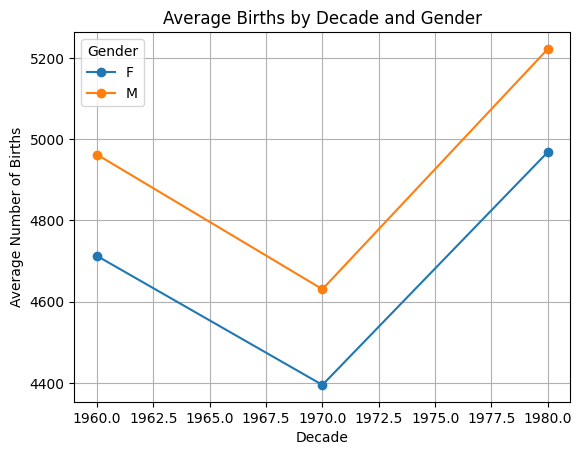

/tmp/ipykernel_57096/3774646630.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births_no_outliers['weekday'] = pd.to_datetime(births_no_outliers[['year', 'month', 'day']]).dt.dayofweek


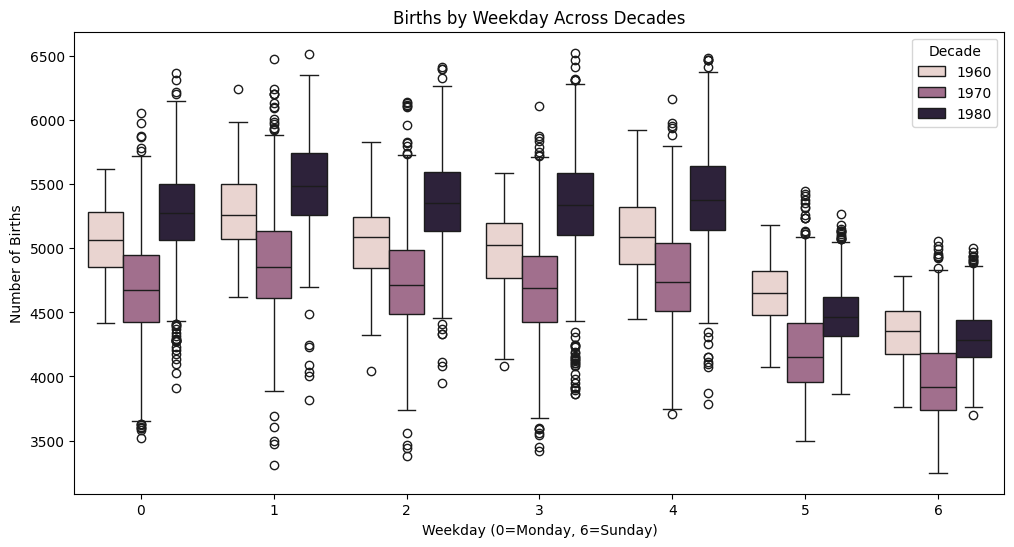

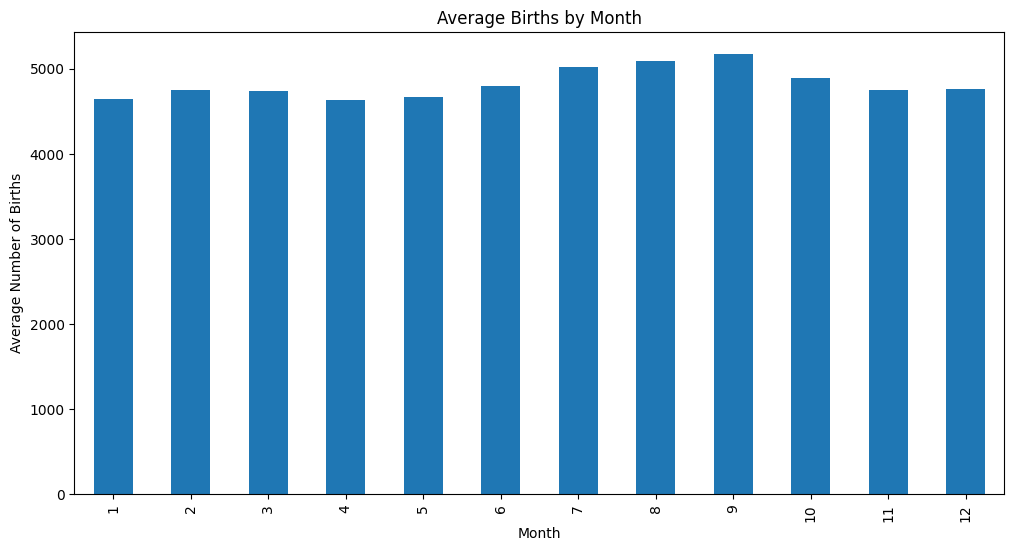

In [3]:
# Reattempting the analysis after cleaning the data
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'births.csv'
births = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
print(births.head())
print(births.info())

# Add a new column 'Decade' by calculating the decade for each year
births['Decade'] = (births['year'] // 10) * 10

# Display the first few rows to confirm the new column
print(births.head())

# Check for missing values in the dataset
missing_values = births.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


# Identify and remove rows with invalid or missing 'day' values
births_cleaned = births.dropna(subset=['day'])

# Ensure 'day' values are integers and within valid range (1-31)
births_cleaned = births_cleaned[births_cleaned['day'].between(1, 31)]

# Confirm the cleaning process
print(births_cleaned.info())
print(births_cleaned.head())

# Calculate average births by decade and gender
decade_gender_births = births_cleaned.groupby(['Decade', 'gender'])['births'].mean().unstack()

# Create the plot
plt.figure(figsize=(12, 6))
decade_gender_births.plot(marker='o')
plt.title('Average Births by Decade and Gender')
plt.xlabel('Decade')
plt.ylabel('Average Number of Births')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

# Remove outliers (within 5 standard deviations)
mean = births_cleaned['births'].mean()
std = births_cleaned['births'].std()
births_no_outliers = births_cleaned[abs(births_cleaned['births'] - mean) <= (5 * std)]

# Analyze births by weekday for different decades
births_no_outliers['weekday'] = pd.to_datetime(births_no_outliers[['year', 'month', 'day']]).dt.dayofweek

# Plot births by weekday for each decade
plt.figure(figsize=(12, 6))
sns.boxplot(data=births_no_outliers, x='weekday', y='births', hue='Decade')
plt.title('Births by Weekday Across Decades')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Number of Births')
plt.show()

# Group by month and day
monthly_births = births_no_outliers.groupby('month')['births'].mean()
daily_births = births_no_outliers.groupby('day')['births'].mean()

# Plot average births by month
plt.figure(figsize=(12, 6))
monthly_births.plot(kind='bar')
plt.title('Average Births by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.show()